In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

ds = pd.read_csv("/content/sample-data.csv")
ds.head(2)

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...


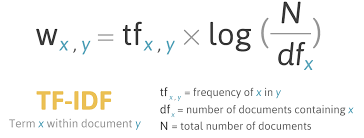

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(ds['description'])

In [ ]:
#Here, the tfidf_matrix is the matrix containing each word and its TF-IDF score with regard to each document, or item in this case.

In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

results = {}

for idx, row in ds.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], ds['id'][i]) for i in similar_indices]

    results[row['id']] = similar_items[1:]
print('done!')    

done!


In [ ]:
#we’ve calculated the cosine similarity of each item with every other item in the dataset, and then arranged them according to their 
#similarity with item i, and stored the values in results

In [ ]:
# Just reads the results out of the dictionary.
def item(id):
    return ds.loc[ds['id'] == id]['description'].tolist()[0].split(' - ')[0]
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")

In [ ]:
#Here, we just input an item_id and the number of recommendations that we want, and voilà! Our function collects the results[] 
#corresponding to that item_id, and we get our recommendations on the screen.

In [ ]:
recommend(item_id=11, num=5)

Recommending 5 products similar to Baby sunshade top...
-------
Recommended: Sunshade hoody (score:0.21330296021085024)
Recommended: Baby baggies apron dress (score:0.10975311296284812)
Recommended: Runshade t-shirt (score:0.09988151262780731)
Recommended: Runshade t-shirt (score:0.09530698241688207)
Recommended: Runshade top (score:0.08510550093018411)
